In [4]:
%matplotlib inline

In [5]:
import os
#os.chdir('/home/esther/Desktop/BehavioralTraining/code')

In [8]:
os.getcwd()

'/home/esther/Desktop/BehavioralTraining/code'

In [9]:
from myFunctions import computeDensityPerPhase
from myFunctions import loadData
from myFunctions import preProcessChoices
from myFunctions import analyseWinStayShift
from myFunctions import makeSideChoices
from myFunctions import removeCancelledTrials
from myFunctions import calcScoresPerDay
from myFunctions import calcScoresPerPhase
from myFunctions import analyseAlternation
from myFunctions import scoreChoices

from preprocessingFunctions import preProcessReactionTimes

from scoringFunctions import scoreChoices
from scoringFunctions import scoreChoicesUnfiltered

from analysisFunctions import testRTbasedOnPhaseScoring

from plottingFunctions import plotIt

In [10]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

In [11]:
#%% LOAD IN DATA
Adat,Mdat = loadData()

In [12]:
#%% PREPROCESS DATA (get sides and choices)
choices, sides = preProcessChoices(Adat, Mdat)

choices = removeCancelledTrials(choices, Mdat)

#%% join dataframes to feed into simulation loop
sideChoices = makeSideChoices(sides,choices)

/home/esther/anaconda/lib/python2.7/site-packages/pandas/core/index.py:4072: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


** First let's see what completely unfiltered data does which is divided into correct and incorrect based purely on the raw sensor scores. Cancelled trials have been removed however, to exclude trials where the experimenter answered (in order to test the program) or the rat never left the startbox.** 

In [32]:
correct, incorrect, nTotalTrials = scoreChoicesUnfiltered(Adat, choices, sides)

In [33]:
rt = Adat.xs('reaction_time',level = 1, axis = 1)

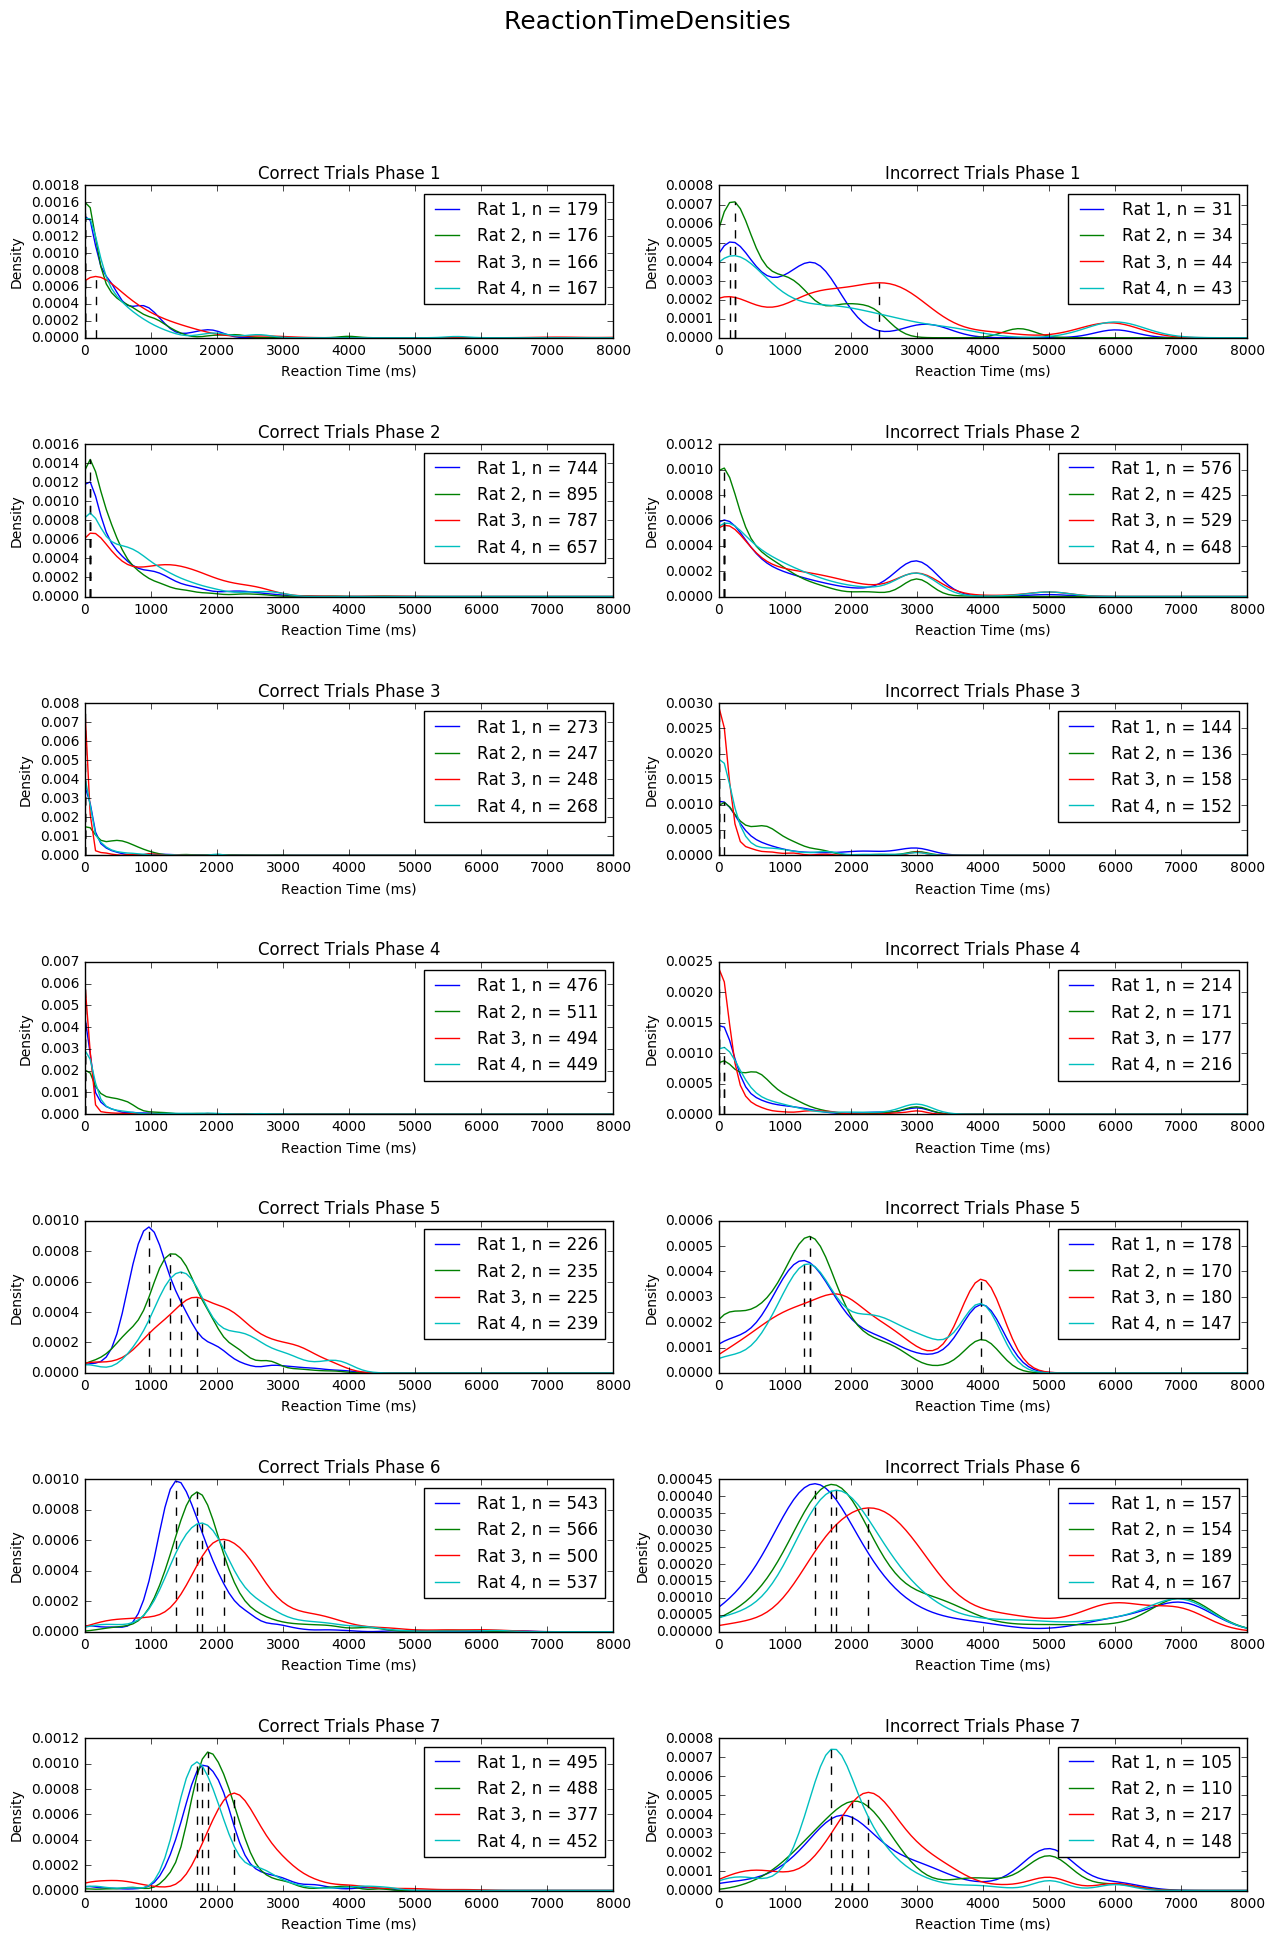

In [35]:
modesCorrect, modesIncorrect = computeDensityPerPhase(rt, correct, incorrect)

** Now lets's see what happends when we exclude trials where hints were given. A trial with a hint is defined here as a trial where 1 reward was given but the rat answered incorrectly (judged by sensor data). In hindsight this is actually a very flawed detection because it now only leaves out incorrect trials with hints, but there's no way with this method to find out which correct trials contained hints. HOWEVER, experimenters/trainers always noted when they gave a hint, and those trials were marked as nan and therefore excluded (by function removeCancelledTrials), since these trials are already excluded it doesn't seem necessary to filter out hints again, but I'll do it just to see what the result is:**

In [ ]:
#%% Determine incorrect and correct trials
validTrials, correct, incorrect, nTotalTrials = scoreChoices(Adat, choices, sides)

# extract reaction times from Adat, and remove trials with reaction times faster than 100ms (false activation of sensors, for instance by tail)
rt = preProcessReactionTimes(Adat, validTrials)

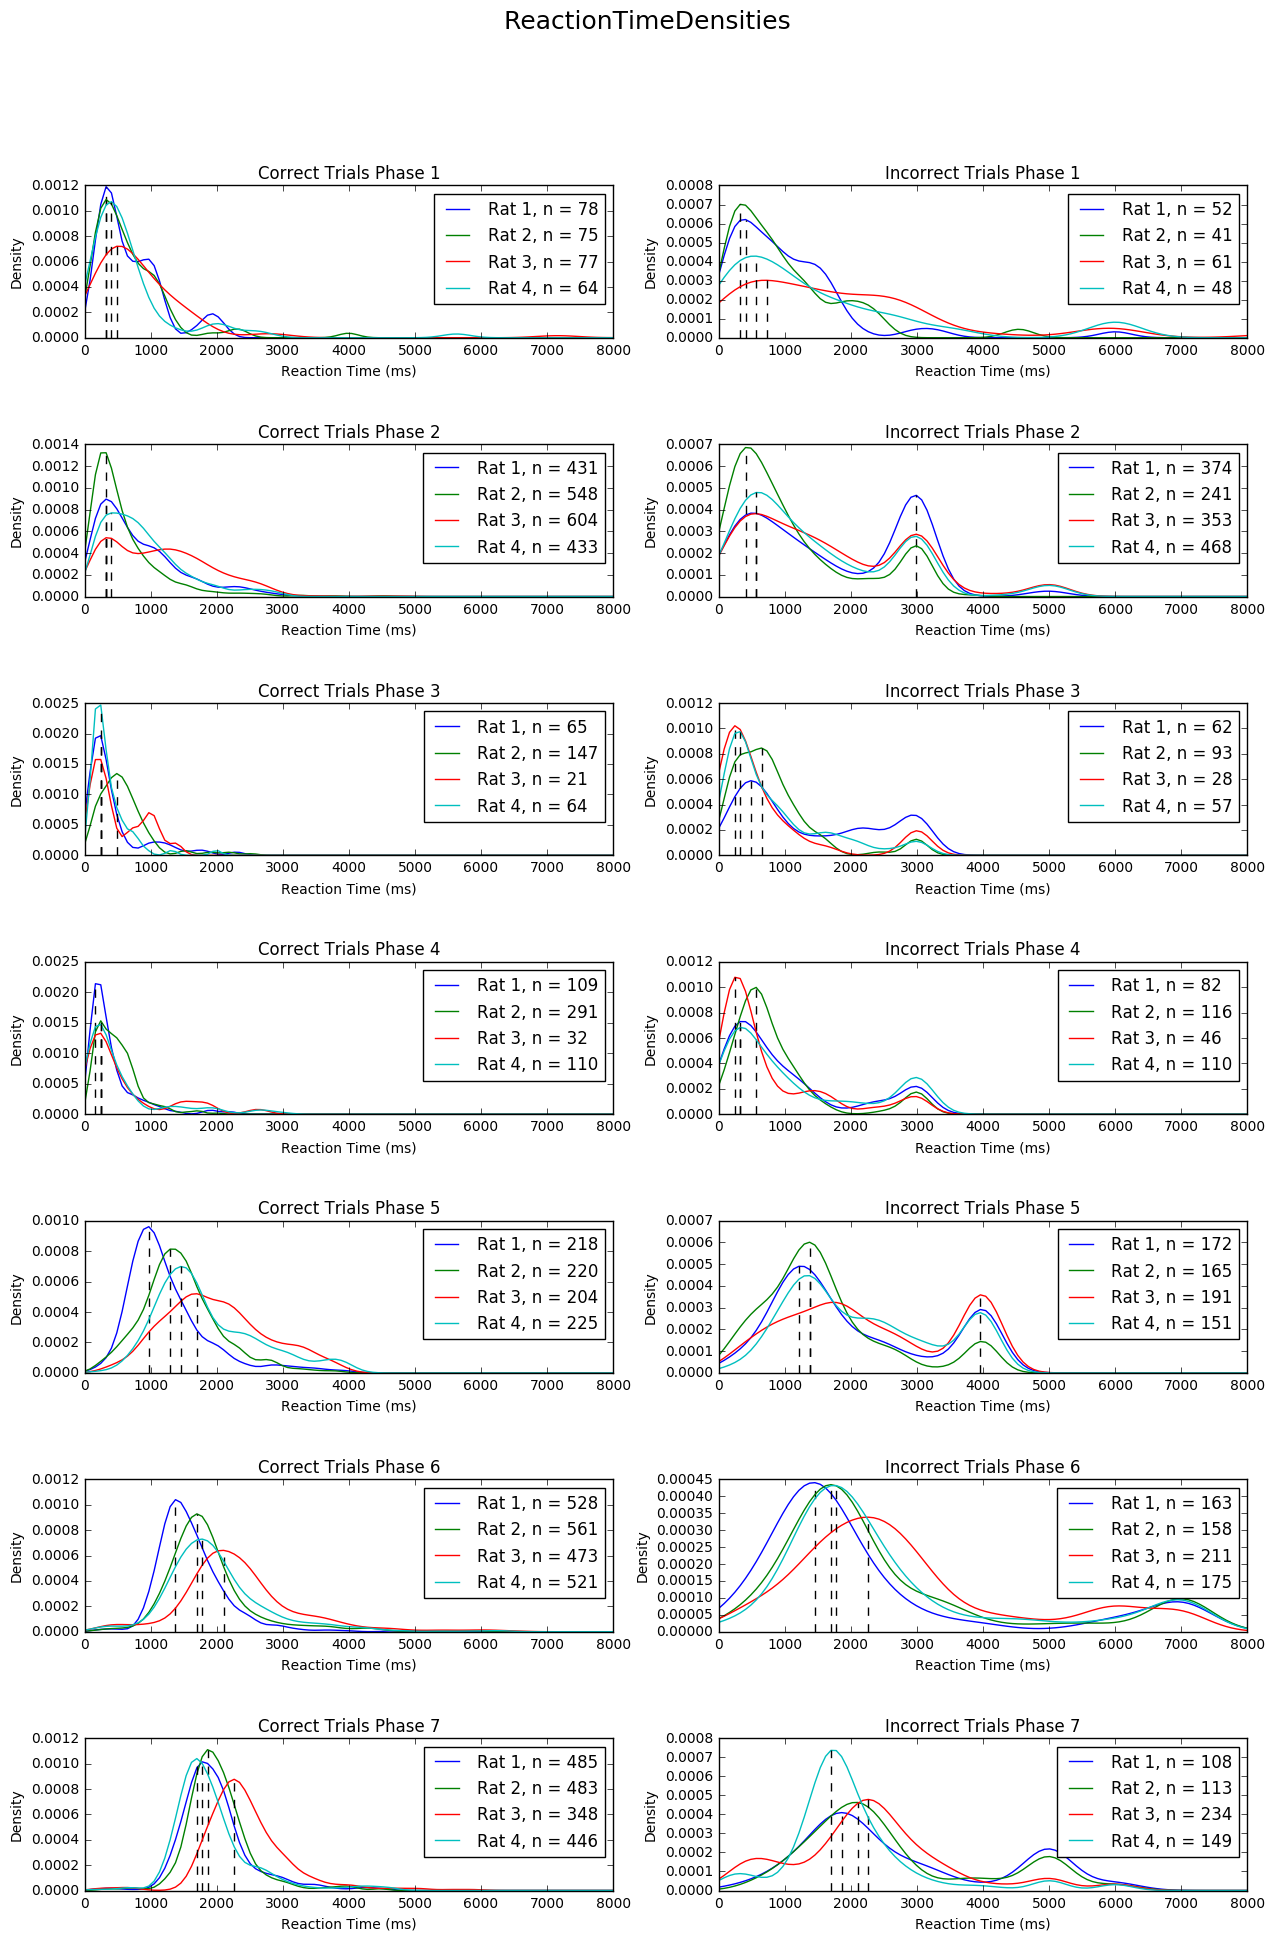

In [18]:
#%% Compute density for correct and incorrect trials
modesCorrect, modesIncorrect = computeDensityPerPhase(rt, correct, incorrect)

** A better method would be to try using scoring per phase (based on number of rewards given, the threshold for a correct trial(# rewards given) varies per phase). This will require making a new function, variation on scorePerPhase (used to calculate the scores per day in this manner), but then rewritten not to immediately calculate a sum per day, but to mark each trial as correct or incorrect (for use as a mask). Turned out to be quick and simple, using a function already used in scorePerPhase.**

In [13]:
rtFiltered, correct, incorrect, valid = testRTbasedOnPhaseScoring(Adat,Mdat)

TypeError: 'NoneType' object is not iterable

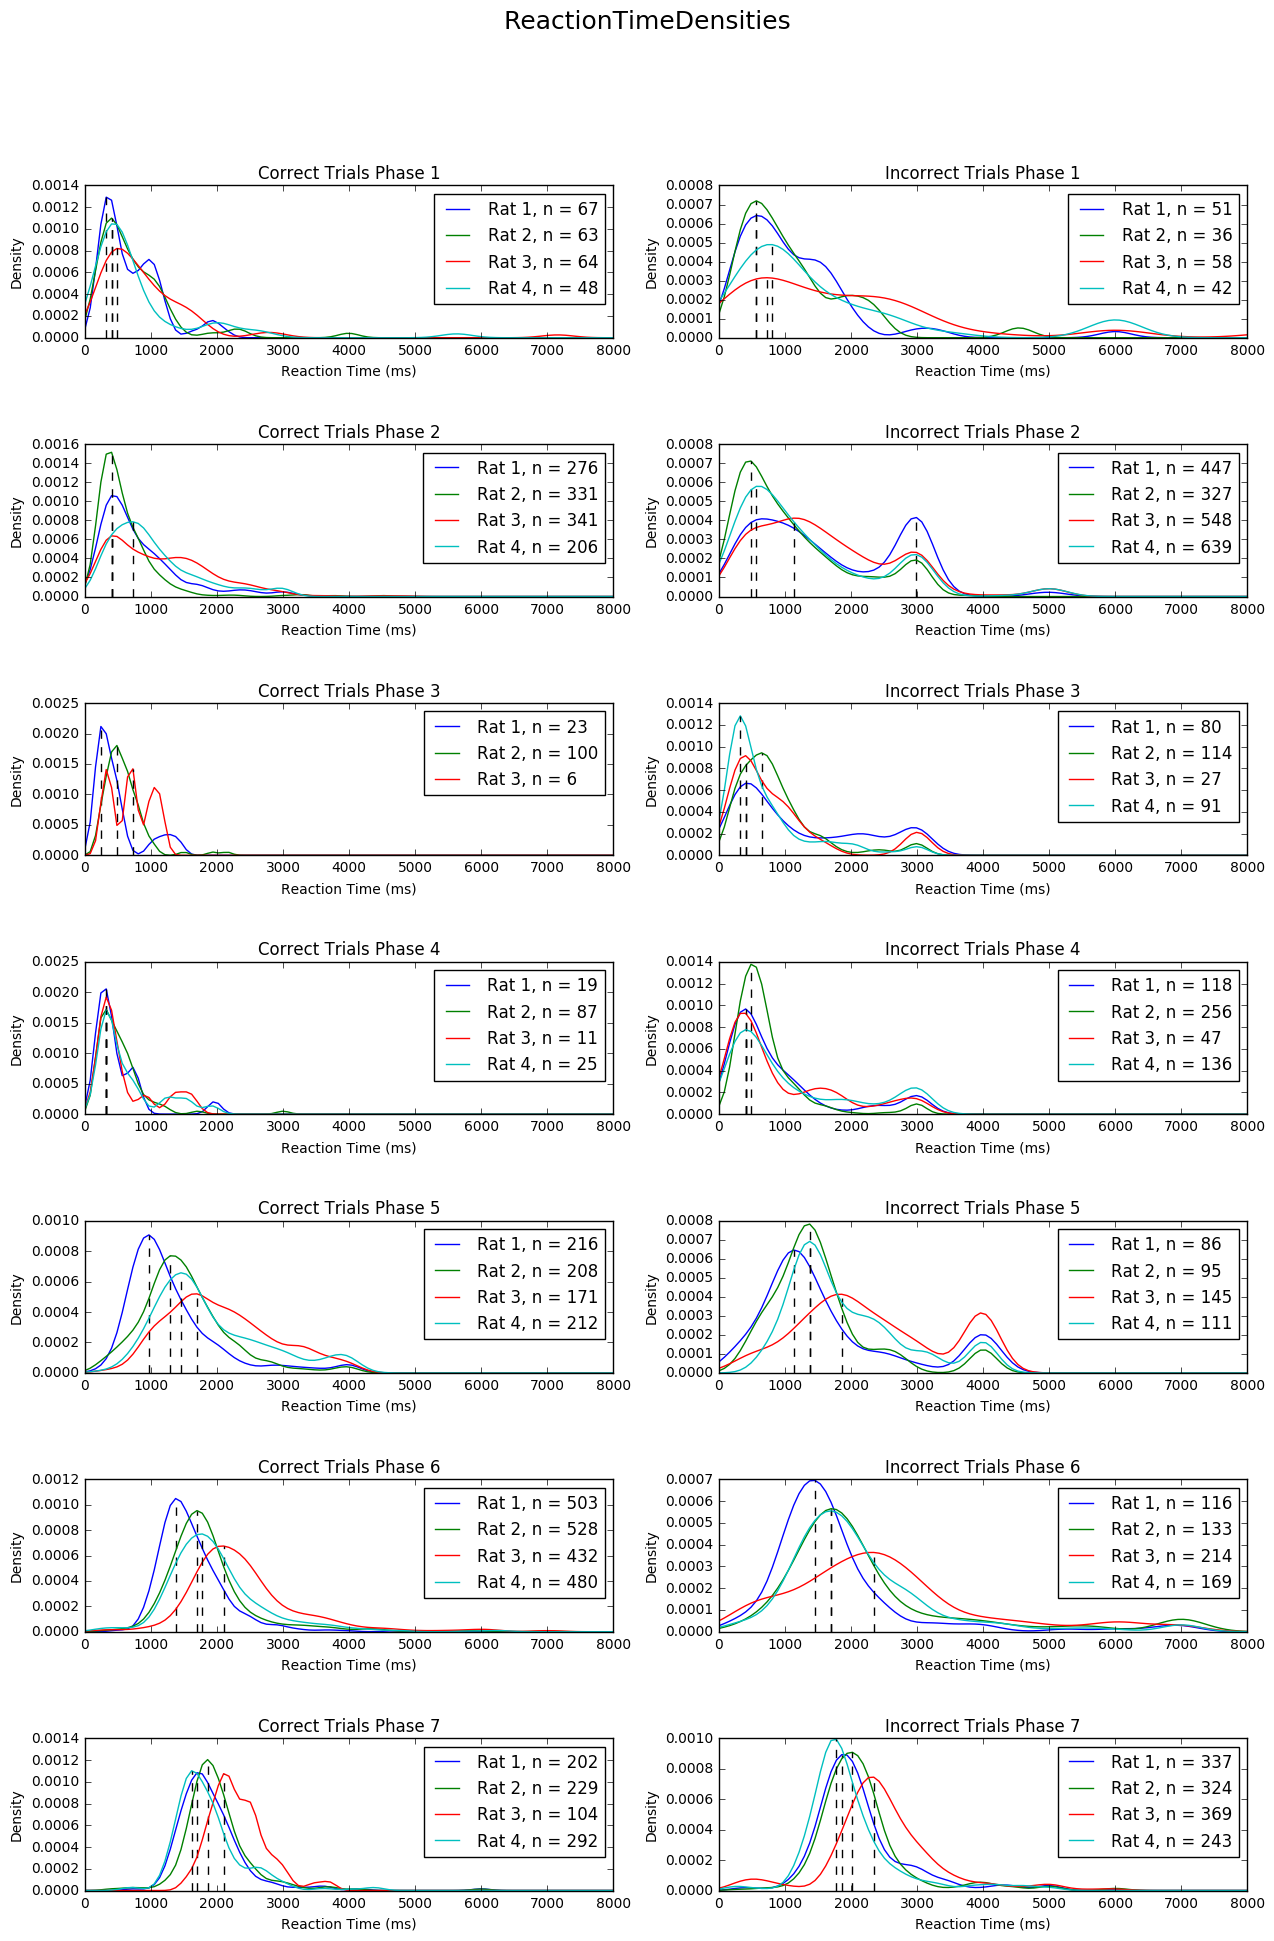

In [14]:
modesCorrect, modesIncorrect = computeDensityPerPhase(rtFiltered, correct, incorrect)